In [5]:
# %pip install python-mnist
# %pip install matplotlib

import os
from mnist import MNIST
import matplotlib.pyplot as plt
import helper
import pickle

%matplotlib inline

In [2]:
mndata = MNIST('dataset')

images, labels = mndata.load_training()

In [6]:
type(images), type(labels), len(images[0]), len(labels)

(list, array.array, 784, 60000)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

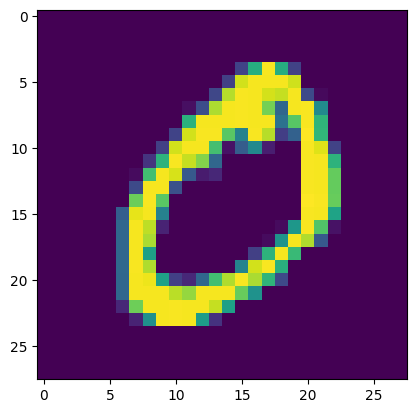

In [4]:
image = helper.reshape(images[1], 28, 28)

plt.imshow(image)

In [14]:
label_5 = []

for i in labels:    
    label_5.append(int(i == 5))

color_rescaled = []
for image in images:    
    image_rescaled = []
    for color in image:
        image_rescaled.append(color / 255)
    
    color_rescaled.append(image_rescaled)


    
weights, history = helper.train(color_rescaled[:10], label_5, 0.1, 10, verbose=True)

Epoch [0]
	- Cross entropy loss: 0.46484526598597053
Epoch [1]
	- Cross entropy loss: 0.41025369359186425
Epoch [2]
	- Cross entropy loss: 0.028884893075853835
Epoch [3]
	- Cross entropy loss: 0.022977253219293847
Epoch [4]
	- Cross entropy loss: 0.018765751836712585
Epoch [5]
	- Cross entropy loss: 0.015845191272655778
Epoch [6]
	- Cross entropy loss: 0.013733436196500439
Epoch [7]
	- Cross entropy loss: 0.012136598953319535
Epoch [8]
	- Cross entropy loss: 0.010885116319462517
Epoch [9]
	- Cross entropy loss: 0.00987642004533376


In [27]:
# predicted_actual
true_true = 0
true_false = 0
false_true = 0
false_false = 0
for i in range(100):
    predicted_5 = helper.predict(color_rescaled[i], weights) >= 0.5
    if predicted_5 and label_5[i] == 1:
        true_true += 1
    
    elif not predicted_5 and label_5[i] == 1:
        false_true += 1
    
    elif not predicted_5 and label_5[i] != 1:
        false_false += 1
    
    elif predicted_5 and label_5[i] != 1:
        false_true += 1
    

In [31]:
false_true

4

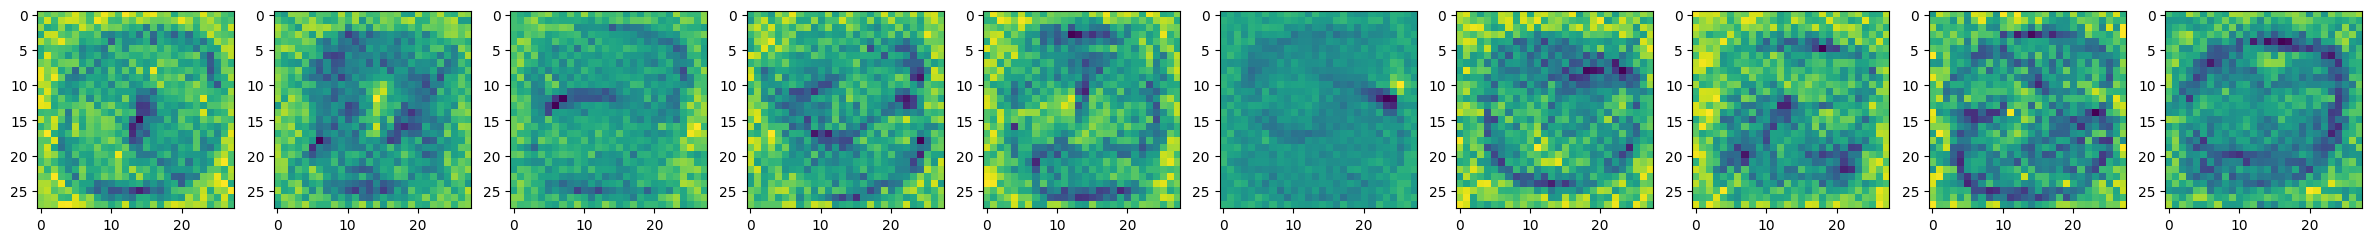

In [12]:
with open('models_naive/learning_rate_[0.01].m', 'rb') as f:
    model = pickle.load(f)

import numpy as np

# draw confussion matrix

fig, axs = plt.subplots(nrows=1, ncols=10)
fig.set_figwidth(30)
for i, ax in enumerate(axs.flat):            
    
    ax.imshow(np.array(model[i][:-1]).reshape(28,28))